In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Evaluation of Test Results from Model Training
Output ``.csv`` files contain all feature variables, the true temperature and a list of the predicted temperatures quantiles ``[5%, 50%, 95%]``. The output does not, however, contain the station names form which the features originate.

In [2]:
outputpath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Testing/mb4t_run2.csv'
trainingset = outputpath.split('.csv')[0] + '_trainingset.csv'
outputfile = pd.read_csv(outputpath, delimiter=',')
outputfile['datetime'] = pd.to_datetime(outputfile['datetime'])
trainingfile = pd.read_csv(trainingset, delimiter=',')
trainingfile['datetime'] = pd.to_datetime(trainingfile['datetime'])

In [3]:
def make_lists(x):
    """ Comes in the form [val1 val2 val3] and must be converted to a list with floats"""
    vals = x.replace('[','').replace(']','')
    vals = ' '.join(vals.split())
    vals = vals.split(' ')

    return [float(val) for val in vals]

def extract_prediction(x: pd.DataFrame):
    """ Extracts the prediction and upper / lower confidence intervals from the prediction list"""
    preds = []
    uCI = []
    lCI = []
    for row in range(len(x)):
        lCI.append(x['Prediction'].iloc[row][0])
        preds.append(x['Prediction'].iloc[row][1])
        uCI.append(x['Prediction'].iloc[row][2])
    return preds, uCI, lCI
        

outputfile['Prediction'] = outputfile['Prediction'].apply(make_lists)
outputfile['Predicted Temperature'], outputfile['Upper Boundary'], outputfile['Lower Boundary'] = extract_prediction(outputfile)

Scatterplot of the predicted and true temperatures

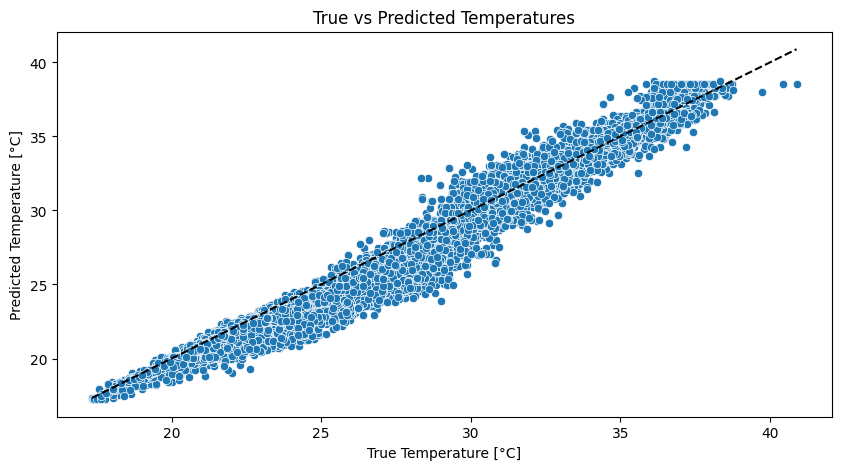

In [4]:
ax, fig = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='True Temperature', y='Predicted Temperature')
ax.set(xlabel='True Temperature [°C]', ylabel='Predicted Temperature [°C]', title='True vs Predicted Temperatures')
# 45° line
bounds = [outputfile['True Temperature'].min(), outputfile['True Temperature'].max()]
ax.plot(bounds, bounds, color='black', linestyle='--')

### Error Metrics

In [5]:
outputfile['Error'] = outputfile['True Temperature'] - outputfile['Predicted Temperature']
rmse = np.sqrt(np.mean(outputfile['Error']**2))
print(f'RMSE: {rmse:.2f}')
print(f'Mean Error: {np.mean(outputfile["Error"]):.2f}')
print(f'Max Error: {np.max(outputfile["Error"]):.2f}')
print(f'Min Error: {np.min(outputfile["Error"]):.2f}')
print(f'Median Error: {np.median(outputfile["Error"]):.2f}')

RMSE: 1.02
Mean Error: 0.44
Max Error: 5.13
Min Error: -3.88
Median Error: 0.36


Error by time scatterplot

C:\Users\ushe\AppData\Local\Temp\ipykernel_13084\1304384105.py:1: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g = sns.jointplot(ax = ax, data=outputfile, x='datetime', y='Error')


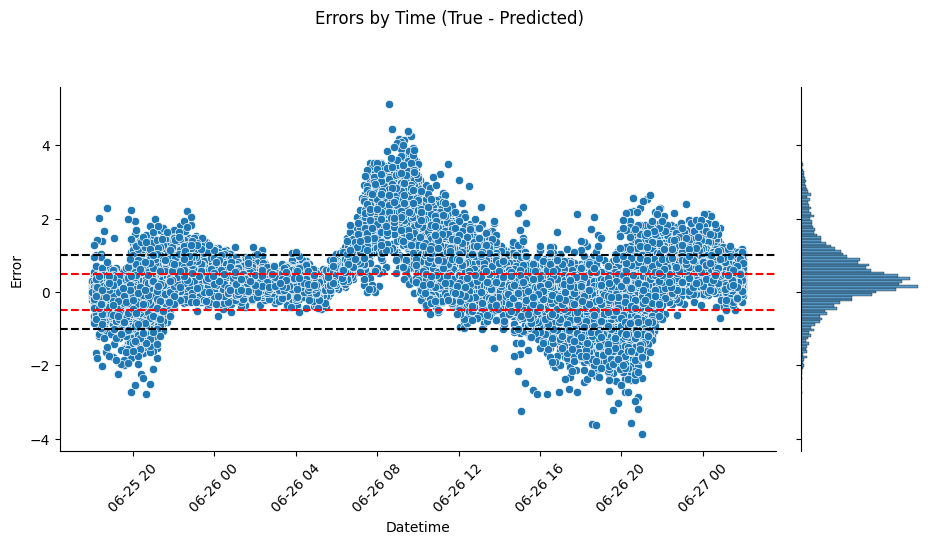

In [6]:
g = sns.jointplot(ax = ax, data=outputfile, x='datetime', y='Error')
g.fig.set_figheight(5)
g.fig.set_figwidth(10)
g.ax_marg_x.remove()
plt.xticks(rotation=45)
g.set_axis_labels('Datetime', 'Error')
g.fig.suptitle('Errors by Time (True - Predicted)')
# Add horizontal lines
plt.axhline(0.5, color='red', linestyle='--')
plt.axhline(-0.5, color='red', linestyle='--')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')



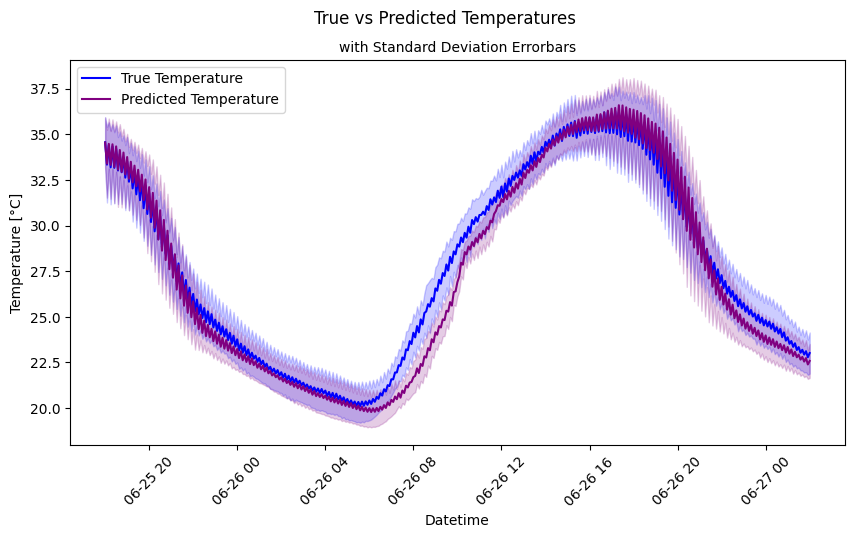

In [7]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=outputfile, x='datetime', y='True Temperature', label='True Temperature', color='blue', errorbar='sd')
sns.lineplot(data=outputfile, x='datetime', y='Predicted Temperature', label='Predicted Temperature', color='purple', errorbar='sd')
plt.xlabel('Datetime')
plt.ylabel('Temperature [°C]')
plt.title('with Standard Deviation Errorbars', fontsize=10)
# plt.title('with Standard Deviation Errorbars')
plt.suptitle('True vs Predicted Temperatures')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Comparison of training and test temperature distributions

[Text(0.5, 0, 'Temperature [°C]'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Temperature Distribution in Training and Test Set')]

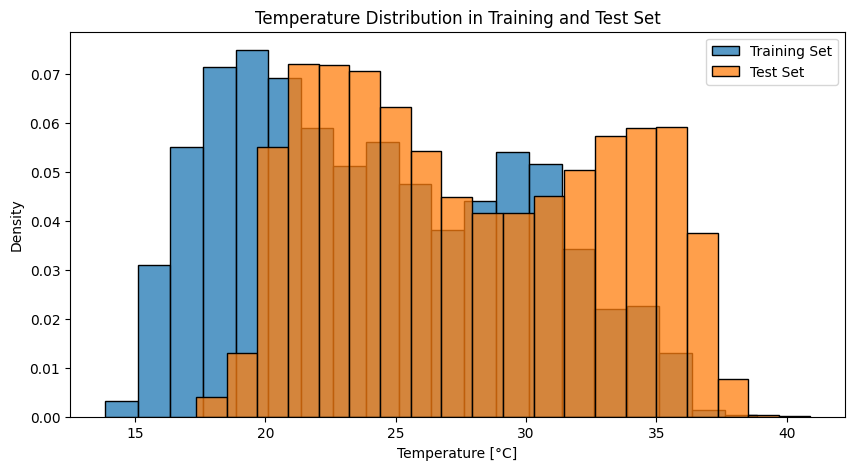

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(trainingfile['Temperature'], stat='density', bins=20)
sns.histplot(outputfile['True Temperature'], stat='density', bins=20)
ax.legend(['Training Set', 'Test Set'])
ax.set(xlabel='Temperature [°C]', ylabel='Density', title='Temperature Distribution in Training and Test Set')

[Text(0.5, 0, 'Datetime'),
 Text(0, 0.5, 'Temperature [°C]'),
 Text(0.5, 1.0, 'Training, Test and Predicted Temperatures')]

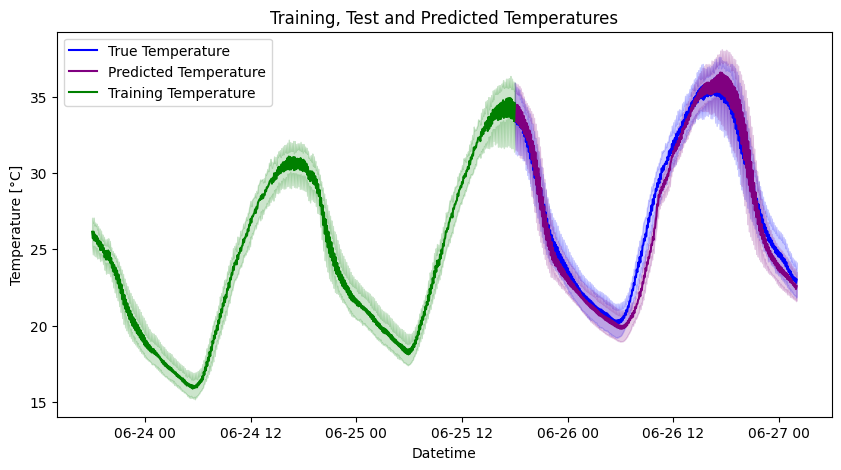

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=outputfile, x='datetime', y='True Temperature', label='True Temperature', color='blue', errorbar='sd')
sns.lineplot(data=outputfile, x='datetime', y='Predicted Temperature', label='Predicted Temperature', color='purple', errorbar='sd')
sns.lineplot(data=trainingfile, x='datetime', y='Temperature', label='Training Temperature', color='green', errorbar='sd')
ax.set(xlabel='Datetime', ylabel='Temperature [°C]', title='Training, Test and Predicted Temperatures')


### Analysis of Confidence Intervals

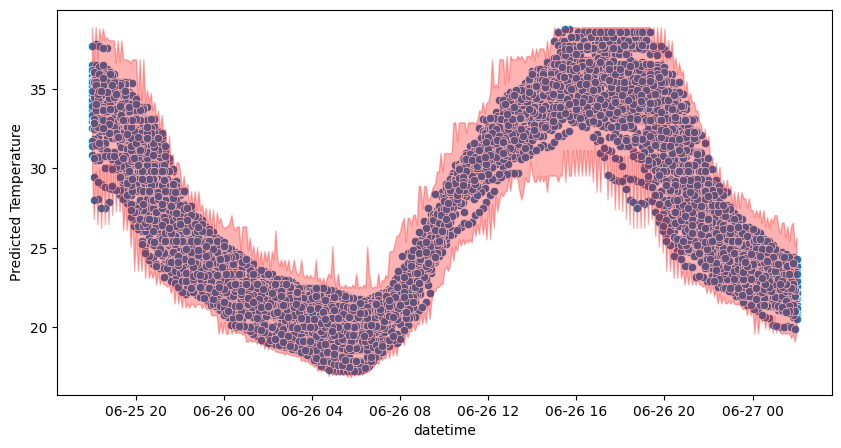

In [10]:
confidence_intervals = {'datetime': [], 'Upper Boundary': [], 'Lower Boundary': []}
for time in outputfile['datetime'].unique():
    confidence_intervals['datetime'].append(time)
    confidence_intervals['Upper Boundary'].append(outputfile[outputfile['datetime'] == time]['Upper Boundary'].max())
    confidence_intervals['Lower Boundary'].append(outputfile[outputfile['datetime'] == time]['Lower Boundary'].min())
confidence_intervals = pd.DataFrame(confidence_intervals)
confidence_intervals.sort_values(by='datetime', inplace=True)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='datetime', y='Predicted Temperature')
# ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Upper Boundary', color='red')
# ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Lower Boundary', color='red')
# Add confidence interval
ax.fill_between(confidence_intervals['datetime'], confidence_intervals['Lower Boundary'], confidence_intervals['Upper Boundary'], color='red', alpha=0.3)


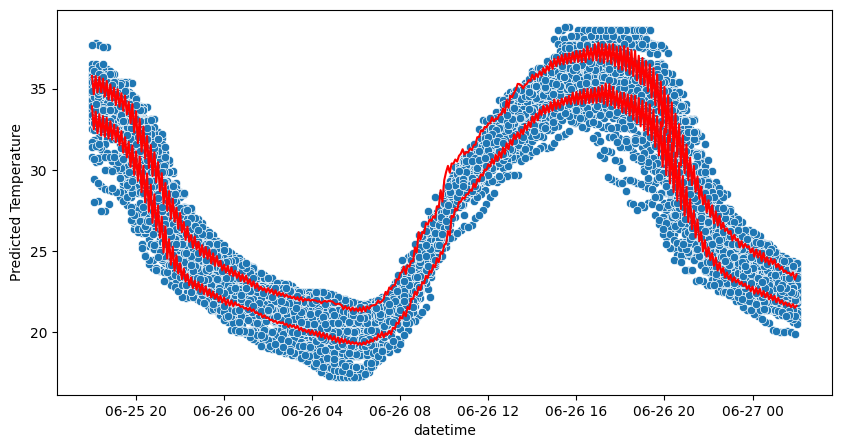

In [11]:
confidence_intervals = {'datetime': [], 'Upper Boundary': [], 'Lower Boundary': []}
for time in outputfile['datetime'].unique():
    confidence_intervals['datetime'].append(time)
    confidence_intervals['Upper Boundary'].append(outputfile[outputfile['datetime'] == time]['Upper Boundary'].mean())
    confidence_intervals['Lower Boundary'].append(outputfile[outputfile['datetime'] == time]['Lower Boundary'].mean())
confidence_intervals = pd.DataFrame(confidence_intervals)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='datetime', y='Predicted Temperature')
ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Upper Boundary', color='red')
ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Lower Boundary', color='red')

## PALM vs. Measurements
Given that the model is trained with PALM data, which is significant to its performance, we quantify the PALM simulation error and remove it from the model error. 

Functions:

In [12]:
import netCDF4 as nc

def extract_surfacetemps(temps):
    ''' 
    Extracts the surface temperatures from a 2D array of temperatures (time, layer) and returns a 
    list of surface temperatures.
    '''
    surf_temps = []
    for time in range(temps.shape[0]):
        for layer in range(temps.shape[1]):
            if temps[time, layer] != -9999:
                surf_temps.append(temps[time, layer] - 273.15)
                break
            else:
                continue
    return surf_temps


def extract_times(origintime: np.datetime64, times_list: list):
    """
    Extracts the time vector, formatting it as a datetime. The time contained within the PALM file is given as
    minutes since origin. Additionally, a boolean vector is generated, indicating the start of the useable time
    series (certain observations are required to create the moving average).
    """
    times = []
    for _, time in enumerate(times_list):
        times.append(origintime + pd.Timedelta(minutes=np.round(time * 24 * 60)))

    #* lost observations fixed, for most PALM files it is 2/56 which are lost
    # lost observations for the one hour moving average: 60 min / timedelta
    td_minutes = (times[2]-times[1]).total_seconds() / 60
    lost_obs = int(60/td_minutes)
    t_bool = [True] * len(times)
    t_bool[0:lost_obs] = [False] * lost_obs
    if not times:
        raise ValueError
    return times


def lv03_to_lv95(lv03_lat: float, lv03_lon: float):
    return lv03_lat + 1000000, lv03_lon + 2000000


def coordinates(palmfile, res=16):
    CH_S, CH_W = lv03_to_lv95(palmfile.origin_y, palmfile.origin_x)
    # CH_S, CH_W, _ = wgs84_to_lv(palmfile.origin_lat, palmfile.origin_lon, 'lv95') #type: ignore
    CH_N = CH_S + palmfile.dimensions['y'].size * res
    CH_E = CH_W + palmfile.dimensions['x'].size * res
    return CH_N, CH_E, CH_S, CH_W


def palm_info(palmfile):
    info = {}
    info['times'] = extract_times(pd.to_datetime(palmfile.origin_time), palmfile['time'])
    info['CH_N'], info['CH_E'], info['CH_S'], info['CH_W'] = coordinates(palmfile)
    return info


def stations_loc(boundary, stations):
    stationscsv = pd.read_csv('S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/Data/Messdaten/stations_new.csv', delimiter=';')
    stationsloc = {}
    print(f'Boundary: N{boundary["CH_N"]} - E{boundary["CH_E"]}')
    for station in stations:
        row = stationscsv[stationscsv['stationid_new'] == station]
        if not row.empty:
            if boundary['CH_W'] <= int(row["CH_E"]) <= boundary['CH_E'] and \
               boundary['CH_S'] <= int(row["CH_N"]) <= boundary['CH_N']:
                stationsloc[station] = {'lat': int(row["CH_N"]), 'lon': int(row["CH_E"]), 
                                        'lat_idx': int((boundary['CH_N'] - row['CH_N']) / 16), 
                                        'lon_idx': int((row['CH_E'] - boundary['CH_W']) / 16)}
    return stationsloc


def extract_measurements(outputfile, stationid, times):
    true_temps = []
    data = outputfile[outputfile['stationid'] == stationid]
    for t in times:
        t = t.tz_localize(None)
        try:
            temp = np.mean(data[data['datetime_round'] == t]['True Temperature'])
            true_temps.append(temp)
        except IndexError as e:
            print(data['datetime'])
            print(t)
            raise e
                
    return true_temps


def add_true_temp(station_data, outputfile):
    stations = station_data['stationid'].unique()
    measurement_list = []
    for station in stations:
        times = station_data[station_data['stationid'] == station]['datetime']
        measurements = extract_measurements(outputfile, station, times)
        measurement_list.extend(measurements)
    station_data['True Temperature'] = measurement_list
    return station_data


def extract_station_data(palmfile, stationsloc, times, outputfile):
    station_data = {'stationid': [], 'datetime': [], 'PALM Temperature': [], 'True Temperature': []}
    for station in stationsloc.keys():
        station_data['stationid'].extend([station] * len(times))
        station_data['datetime'].extend(times)
        try:
            surfacetemps = extract_surfacetemps(palmfile['theta_xy'][:, :, stationsloc[station]['lat_idx'], stationsloc[station]['lon_idx']])
            station_data['PALM Temperature'].extend(surfacetemps)
            station_data['True Temperature'].extend(extract_measurements(outputfile, station, times))
        except IndexError as e:
            print(stationsloc[station]['lat_idx'], stationsloc[station]['lon_idx'])
            print(palmfile['theta_xy'].shape)
            raise e
        
    # station_data = add_true_temp(pd.DataFrame(station_data), outputfile)
    return pd.DataFrame(station_data)


In [13]:
palm_paths = {'mb4': 'mb_4_multi_stations_xy_N02.00m.nc',
              'mb5': 'mb_5_multi_stations_LCZ_xy_N02.00m.nc',
              'mb6': 'mb_6_multi_stations_LCZ_xy_N02.00m.nc',
              'mb7': 'mb_7_multi_stations_LCZ_xy_N02.00m.nc',
              'mb8': 'mb_8_multi_stations_LCZ_xy_N02.00m.nc'}
palmnr = os.path.basename(outputpath).split('_')[0][0:3]
palmpath = f'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/Data/PALM Maps/{palm_paths[palmnr]}'
palmfile = nc.Dataset(palmpath, 'r')
palminfo = palm_info(palmfile)
stations = outputfile['stationid'].unique()
outputfile['datetime_round'] = pd.to_datetime(outputfile['datetime']).dt.round('30min')
stationlocation = stations_loc(palminfo, stations)
station_data = extract_station_data(palmfile, stationlocation, palminfo['times'], outputfile)

Boundary: N1252232.0 - E2684232.0


C:\Users\ushe\AppData\Local\Temp\ipykernel_13084\2971310537.py:66: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if boundary['CH_W'] <= int(row["CH_E"]) <= boundary['CH_E'] and \
C:\Users\ushe\AppData\Local\Temp\ipykernel_13084\2971310537.py:67: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  boundary['CH_S'] <= int(row["CH_N"]) <= boundary['CH_N']:
C:\Users\ushe\AppData\Local\Temp\ipykernel_13084\2971310537.py:68: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  stationsloc[station] = {'lat': int(row["CH_N"]), 'lon': int(row["CH_E"]),
C:\Users\ushe\AppData\Local\Temp\ipykernel_13084\2971310537.py:69: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. U

In [20]:
station_data.dropna(inplace=True)


[Text(0.5, 0, 'True Temperature [°C]'),
 Text(0, 0.5, 'Simulated Temperature [°C]'),
 Text(0.5, 1.0, 'True vs Simulated Temperatures')]

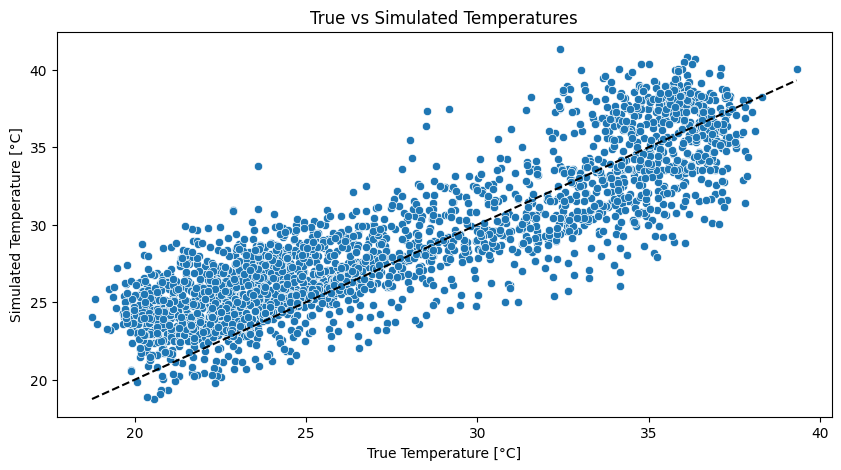

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=station_data, x='True Temperature', y='PALM Temperature')
bounds = [station_data['True Temperature'].min(), station_data['True Temperature'].max()]
ax.plot(bounds, bounds, color='black', linestyle='--')
ax.set(xlabel='True Temperature [°C]', ylabel='Simulated Temperature [°C]', title='True vs Simulated Temperatures')



In [22]:
station_data['Error'] = station_data['True Temperature'] - station_data['PALM Temperature']
rmse = np.sqrt(np.mean(station_data['Error']**2))
print(f'RMSE: {rmse:.2f}')
print(f'Mean Error: {np.mean(station_data["Error"]):.2f}')
print(f'Max Error: {np.max(station_data["Error"]):.2f}')
print(f'Min Error: {np.min(station_data["Error"]):.2f}')
print(f'Median Error: {np.median(station_data["Error"]):.2f}')

RMSE: 2.95
Mean Error: -1.14
Max Error: 8.07
Min Error: -10.23
Median Error: -1.25
